In [16]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
import configparser

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [17]:
config = configparser.ConfigParser()
config.sections()
config.read('config.ini')

bp_file =config['DEFAULT']['SmkAlcHist']
bp_file_p =config['DEFAULT']['SmkAlcHist_p']

In [18]:
data_pd = pd.read_csv(bp_file, sep='|')


In [19]:
len(data_pd), len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

(179937, 6166)

In [20]:
pd.Series(data_pd["SmokingStatus"].tolist()).sort_values().unique()

array(['Current Every Day Smoker', 'Current Some Day Smoker',
       'Former Smoker', 'Heavy Tobacco Smoker', 'Light Tobacco Smoker',
       'Never Assessed', 'Never Smoker',
       'Passive Smoke Exposure - Never Smoker',
       'Smoker, Current Status Unknown', 'Unknown If Ever Smoked'],
      dtype=object)

In [21]:
data_pd.head()

,Deidentified_Pat_ID,SmokingStatus,TOBACCO_PAK_PER_DY,SmokelessStatus,AlcoholStatus,PhysicalActivityDaysPerWeek,PhysicalActivityMinsPerSession
0,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN
1,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN
2,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN
3,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN
4,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN


In [22]:
def smk_type(x):
    if x == 'Never Smoker':
        return 1

    elif x == 'Former Smoker':
        return 2
    elif x == 'Passive Smoke Exposure - Never Smoker':
        return 3
    elif x == 'Light Tobacco Smoker':
        return 4
    elif x == 'Current Some Day Smoker':
        return 5
    elif x == 'Smoker, Current Status Unknown':
        return 6
    elif x == 'Current Some Day Smoker':
        return 7
    elif x == 'Current Every Day Smoker':
        return 8
    elif x == 'Heavy Tobacco Smoker':
        return 9
    else:
#        print(x)
        return 0


In [23]:
data_pd['smktype'] = data_pd['SmokingStatus'].apply(lambda x: smk_type(x))

In [24]:
data_pd.head()

,Deidentified_Pat_ID,SmokingStatus,TOBACCO_PAK_PER_DY,SmokelessStatus,AlcoholStatus,PhysicalActivityDaysPerWeek,PhysicalActivityMinsPerSession,smktype
0,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN,1
1,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN,1
2,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN,1
3,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN,1
4,ZHHZVNK,Never Smoker,NaN,Never Used,Yes,NaN,NaN,1


In [25]:
len(data_pd), len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

(179937, 6166)

In [26]:
data_pd.sort_values(['Deidentified_Pat_ID','smktype'], inplace=True)

data_pd.drop_duplicates(["Deidentified_Pat_ID"], keep='last', inplace=True)

In [27]:
len(data_pd), len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

(6166, 6166)

In [28]:
data_pd = data_pd[['Deidentified_Pat_ID', 'smktype']]
data_pd.to_csv(bp_file_p, index=False)

In [29]:
data_pd.pivot_table(index=['smktype'], aggfunc='size')

smktype
0       4
1    3741
2    1670
3     129
4      27
5     103
6       4
8     475
9      13
dtype: int64

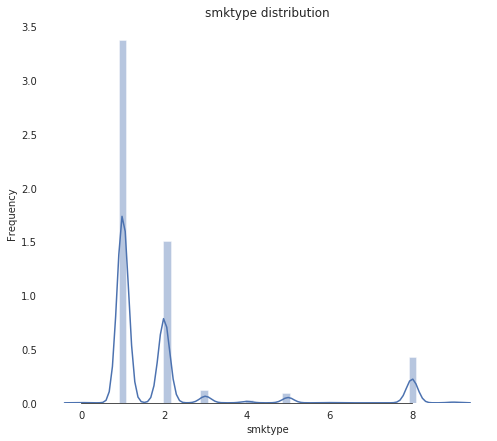

In [30]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd['smktype'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="smktype")
ax.set(title="smktype distribution")
sns.despine(trim=True, left=True)
plt.show()